In [1]:
# Import Lab
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
#Load the data
df= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', sep = ',', names=['Sample code number: id number','Clump Thickness: 1 - 10','Uniformity of Cell Size: 1 - 10','Uniformity of Cell Shape: 1 - 10','Marginal Adhesion: 1 - 10','Single Epithelial Cell Size: 1 - 10','Bare Nuclei: 1 - 10','Bland Chromatin: 1 - 10','Normal Nucleoli: 1 - 10','Mitoses: 1 - 10','Class: (2 for benign, 4 for malignant)'])
df.head()

,Sample code number: id number,Clump Thickness: 1 - 10,Uniformity of Cell Size: 1 - 10,Uniformity of Cell Shape: 1 - 10,Marginal Adhesion: 1 - 10,Single Epithelial Cell Size: 1 - 10,Bare Nuclei: 1 - 10,Bland Chromatin: 1 - 10,Normal Nucleoli: 1 - 10,Mitoses: 1 - 10,"Class: (2 for benign, 4 for malignant)"
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
#dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Sample code number: id number           699 non-null    int64 
 1   Clump Thickness: 1 - 10                 699 non-null    int64 
 2   Uniformity of Cell Size: 1 - 10         699 non-null    int64 
 3   Uniformity of Cell Shape: 1 - 10        699 non-null    int64 
 4   Marginal Adhesion: 1 - 10               699 non-null    int64 
 5   Single Epithelial Cell Size: 1 - 10     699 non-null    int64 
 6   Bare Nuclei: 1 - 10                     699 non-null    object
 7   Bland Chromatin: 1 - 10                 699 non-null    int64 
 8   Normal Nucleoli: 1 - 10                 699 non-null    int64 
 9   Mitoses: 1 - 10                         699 non-null    int64 
 10  Class: (2 for benign, 4 for malignant)  699 non-null    int64 
dtypes: int

In [4]:
df['Bare Nuclei: 1 - 10'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei: 1 - 10, dtype: int64

In [5]:
df['Bare Nuclei: 1 - 10'].replace('?',-1,inplace=True)

In [6]:
df[df['Bare Nuclei: 1 - 10']==-1]

,Sample code number: id number,Clump Thickness: 1 - 10,Uniformity of Cell Size: 1 - 10,Uniformity of Cell Shape: 1 - 10,Marginal Adhesion: 1 - 10,Single Epithelial Cell Size: 1 - 10,Bare Nuclei: 1 - 10,Bland Chromatin: 1 - 10,Normal Nucleoli: 1 - 10,Mitoses: 1 - 10,"Class: (2 for benign, 4 for malignant)"
23,1057013,8,4,5,1,2,-1,7,3,1,4
40,1096800,6,6,6,9,6,-1,7,8,1,2
139,1183246,1,1,1,1,1,-1,2,1,1,2
145,1184840,1,1,3,1,2,-1,2,1,1,2
158,1193683,1,1,2,1,3,-1,1,1,1,2
164,1197510,5,1,1,1,2,-1,3,1,1,2
235,1241232,3,1,4,1,2,-1,3,1,1,2
249,169356,3,1,1,1,2,-1,3,1,1,2
275,432809,3,1,3,1,2,-1,2,1,1,2
292,563649,8,8,8,1,2,-1,6,10,1,4


In [7]:
df[df['Uniformity of Cell Size: 1 - 10']<=6]['Bare Nuclei: 1 - 10'].value_counts(normalize=True)        

1     0.679931
10    0.122837
2     0.041522
3     0.038062
5     0.031142
-1    0.025952
4     0.017301
8     0.015571
7     0.013841
9     0.008651
6     0.005190
Name: Bare Nuclei: 1 - 10, dtype: float64

In [8]:
df[df['Uniformity of Cell Shape: 1 - 10']<=6]['Bare Nuclei: 1 - 10'].value_counts(normalize=True)

1     0.684028
10    0.118056
2     0.043403
3     0.039931
5     0.032986
-1    0.026042
4     0.022569
8     0.012153
7     0.010417
9     0.006944
6     0.003472
Name: Bare Nuclei: 1 - 10, dtype: float64

In [9]:
df[df['Mitoses: 1 - 10']==1]['Bare Nuclei: 1 - 10'].value_counts(normalize=True)

1     0.671848
10    0.120898
2     0.041451
5     0.036269
3     0.034542
8     0.029361
-1    0.027634
4     0.022453
7     0.008636
9     0.005181
6     0.001727
Name: Bare Nuclei: 1 - 10, dtype: float64

In [10]:
#missing places
df['Bare Nuclei: 1 - 10'].replace(-1,1,inplace=True)
df.head()

,Sample code number: id number,Clump Thickness: 1 - 10,Uniformity of Cell Size: 1 - 10,Uniformity of Cell Shape: 1 - 10,Marginal Adhesion: 1 - 10,Single Epithelial Cell Size: 1 - 10,Bare Nuclei: 1 - 10,Bland Chromatin: 1 - 10,Normal Nucleoli: 1 - 10,Mitoses: 1 - 10,"Class: (2 for benign, 4 for malignant)"
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [11]:
#data Encoding

In [12]:
df.rename(columns={"Class: (2 for benign, 4 for malignant)":"Class"},inplace=True)

In [13]:
df

,Sample code number: id number,Clump Thickness: 1 - 10,Uniformity of Cell Size: 1 - 10,Uniformity of Cell Shape: 1 - 10,Marginal Adhesion: 1 - 10,Single Epithelial Cell Size: 1 - 10,Bare Nuclei: 1 - 10,Bland Chromatin: 1 - 10,Normal Nucleoli: 1 - 10,Mitoses: 1 - 10,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [14]:
df.Class = df.Class.map({2: 0, 4:1})

In [15]:
df

,Sample code number: id number,Clump Thickness: 1 - 10,Uniformity of Cell Size: 1 - 10,Uniformity of Cell Shape: 1 - 10,Marginal Adhesion: 1 - 10,Single Epithelial Cell Size: 1 - 10,Bare Nuclei: 1 - 10,Bland Chromatin: 1 - 10,Normal Nucleoli: 1 - 10,Mitoses: 1 - 10,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,0
695,841769,2,1,1,1,2,1,1,1,1,0
696,888820,5,10,10,3,7,3,8,10,2,1
697,897471,4,8,6,4,3,4,10,6,1,1


<AxesSubplot:>

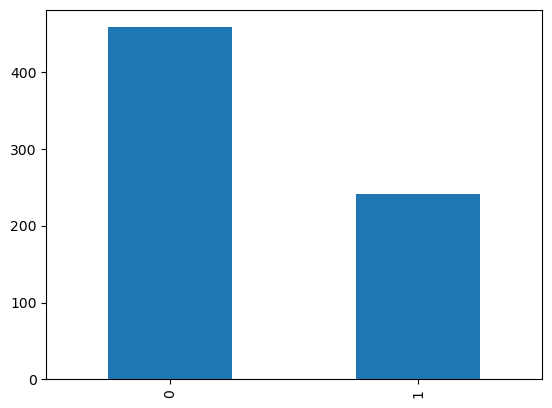

In [16]:
df.Class.value_counts().plot.bar()

In [17]:
#Spliting
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score,accuracy_score)
from sklearn.model_selection import train_test_split

In [18]:
x = df.drop(['Sample code number: id number','Class'],axis=1).values
y = df.Class.values

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [20]:
df.Class.unique()

array([0, 1], dtype=int64)

In [21]:
#accuracy
clf_svc = SVC(C=1.0,
                kernel='rbf',
                degree=3,
                gamma='scale',
                coef0=0.0,
                shrinking=True,
                probability=False,
                tol=0.001,
                cache_size=200,
                class_weight=None,
                verbose=False,
                max_iter=-1,
                decision_function_shape='ovr',
                break_ties=False,
                random_state=None)

In [22]:
clf_svc.fit(x_train,y_train)

SVC()

In [23]:
y_hat = clf_svc.predict(x_test)

In [24]:
print(f'Accuracy Score is {accuracy_score(y_test,y_hat)}')

Accuracy Score is 0.9714285714285714


In [25]:
clf_1 = LogisticRegression(C=1.0, class_weight={0:100,1:0.2}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
clf_2 = LogisticRegression(C=1.0, class_weight={0:0.001,1:90000}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
clf_2.fit(x,y)

LogisticRegression(class_weight={0: 0.001, 1: 90000})

In [28]:
from sklearn.metrics import precision_score

In [29]:
y_hat = clf_2.predict(x)

In [30]:
#precision tp / (tp + fp)
precision = precision_score(y, y_hat)
print('Precision: %f' % precision)

Precision: 0.344778


In [31]:
from sklearn.metrics import recall_score

In [32]:
# recall: tp / (tp + fn)
recall = recall_score(y, y_hat)
print('Recall: %f' % recall)

Recall: 1.000000


In [33]:
def find_TP(y, y_hat):
    # counts the number of true positives (y = 1, y_hat = 1)
    return sum((y == 1) & (y_hat == 1))
def find_FP(y, y_hat):
    # counts the number of false negatives (y = 1, y_hat = 0)
    return sum((y == 1) & (y_hat == 0))
def find_FN(y, y_hat):
    # counts the number of false positives (y = 0, y_hat = 1)
    return sum((y == 0) & (y_hat == 1))
def find_TN(y, y_hat):
    # counts the number of true negatives (y = 0, y_hat = 0)
    return sum((y == 0) & (y_hat == 0))

In [34]:
print('TP:',find_TP(y, y_hat))
print('FN:',find_FN(y, y_hat))
print('FP:',find_FP(y, y_hat))
print('TN:',find_TN(y, y_hat))


TP: 241
FN: 458
FP: 0
TN: 0


In [35]:
TP = find_TP(y, y_hat)
FN = find_FN(y, y_hat)
FP = find_FP(y, y_hat)
TN = find_TN(y, y_hat)
precision = TP/(TP+FP)
print('Precision:',precision)


Precision: 1.0


In [36]:
from sklearn.metrics import plot_precision_recall_curve

C:\Users\Shivdnya\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=1.00')

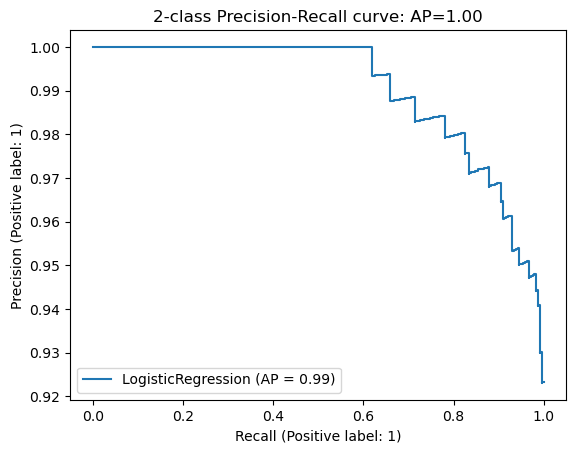

In [37]:
disp = plot_precision_recall_curve(clf_2, x, y)
disp.ax_.set_title('2-class Precision-Recall curve: ''AP={0:0.2f}'.format(precision))

In [38]:
from sklearn.metrics import f1_score
f1score = 2*((precision*recall)/(precision+recall))
print('F1 score: %f' % f1score)

F1 score: 1.000000


In [39]:
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y, y_hat)
print('F1 score: %f' % f1)

F1 score: 0.512766


In [40]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.995


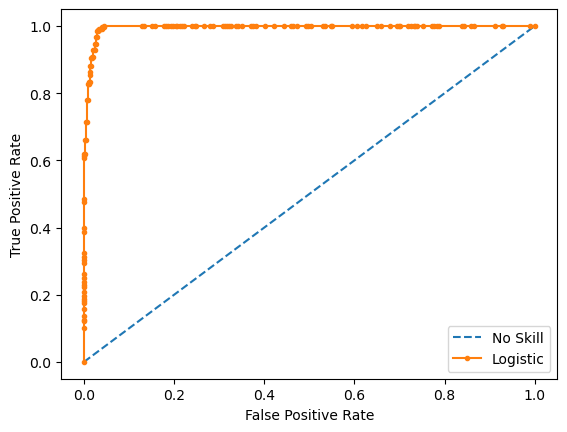

In [41]:
ns_probs = [0 for _ in range(len(y))]
# predict probabilities
lr_probs = clf_2.predict_proba(x)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y, ns_probs)
lr_auc = roc_auc_score(y, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()
pyplot.show()

In [42]:
TPR = TP/(TP+FN)
FPR = FP/(FP+TN)

print('TPR: ',TPR)
print('FPR: ',FPR)

TPR:  0.3447782546494993
FPR:  nan


C:\Users\Shivdnya\AppData\Local\Temp\ipykernel_8720\3518512466.py:2: RuntimeWarning: invalid value encountered in long_scalars
  FPR = FP/(FP+TN)


In [43]:
lr_probs.shape

(699,)

In [44]:
#Build Logistic Regression with Hyperparameter

In [45]:
logModel = LogisticRegression()

In [46]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [49]:
best_clf = clf.fit(x,y)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


C:\Users\Shivdnya\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2160 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shivdnya\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shivdnya\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Shivdnya\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise

In [50]:
best_clf.best_estimator_

LogisticRegression(C=0.0001, max_iter=1000, penalty='none', solver='saga')

In [51]:
print (f'Accuracy - : {best_clf.score(x,y):.3f}')

Accuracy - : 0.970
